In [32]:
import pandas as pd
data = pd.read_csv('ODI-2018-better.csv')

In [33]:
print(data)

            Timestamp What programme are you in?  \
0    04/05/2018 11:22                        QRM   
1    04/05/2018 11:23                         CS   
2    04/05/2018 11:23                         BA   
3    04/05/2018 11:23                         BA   
4    04/05/2018 11:23                         CS   
5    04/05/2018 11:24  Drug discovery and safety   
6    04/05/2018 11:25                         CS   
7    04/05/2018 11:25                         CS   
8    04/05/2018 11:25               Econometrics   
9    04/05/2018 11:25             Bioinformatics   
10   04/05/2018 11:25               Econometrics   
11   04/05/2018 11:26                         CS   
12   04/05/2018 11:26            Bioinformatics    
13   04/05/2018 11:26                         AI   
14   04/05/2018 11:26                        EOR   
15   04/05/2018 11:26             Bioinformatics   
16   04/05/2018 11:26                         BA   
17   04/05/2018 11:26                         BA   
18   04/05/2

In [34]:
data.shape


(217, 16)

In [35]:
del data['Timestamp']

In [36]:
d = {'mu':1,
     'sigma':0,
     'no':0,
     'yes':1,
     'unknown':2,
     'nee':0,
     'ja':1,
     "male":0,
     "female":1,
     'fat':0,
     'slim':1,
     'neither':2,
     'I have no idea what you are talking about':3}

In [37]:
dat2 = data.replace(d)

In [38]:
data.columns

Index(['What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'You can get £100 if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would get then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

In [39]:
# Functions that parse data or help it in some way
def clean(data):
    bla = data.copy()
    for i,entry in enumerate(data):
        bla[i] = entry.strip()
    return bla

import math
def get_date_tuple(data):
    if len(data) == 2:
        
        mo = data[1]
        yr = None
    elif len(data) == 3:
        
        if len(data[2]) == 4:
            yr = data[2][-2:]
        elif len(data[2]) == 2:
            yr = data[2]
        else:
            yr = None
        mo = data[1]
    
    else:
        mo = yr = None
    result = (mo, yr)
    return result
    
def parse_birthdate(pandas_series):
    cp = pandas_series.copy()
    for i, entry in enumerate(pandas_series):
        if type(entry) == float:
            cp[i] = (None, None)
        else:
            if '/' in entry:
                date = [x.strip() for x in entry.split('/')]
                cp[i] = get_date_tuple(date)
            elif '-' in entry:
                date = [x.strip() for x in entry.split('-')]
                cp[i] = get_date_tuple(date)
            elif '.' in entry:
                date = [x.strip() for x in entry.split('.')]
                cp[i] = get_date_tuple(date)
            else:
                cp[i] = (None, None)
    return cp

In [40]:
data = dat2
d0 = data['What programme are you in?'] # Discrete
d1 = data['Have you taken a course on machine learning?'] # Binary
d2 = data['Have you taken a course on information retrieval?'] # Binary
d3 = data['Have you taken a course on statistics?'] # Binary
d4 = data['Have you taken a course on databases?'] # Binary
d5 = data['What is your gender?'] # Discrete
d6 = data['Chocolate makes you.....'] # Discrete
d7 = data['When is your birthday (date)?'] # ~
d8 = data['Did you stand up?'] # Binary
d9 = data['Give a random number'] # Continuous
d0 = clean(d0)
d7 = parse_birthdate(d7)


7
7.0
394749
394749.0
6
6.0
8
8.0
8
8.0
No
could not convert string to float: 'No'
6739
6739.0
3
3.0
78952097
78952097.0
5
5.0
8
8.0
42
42.0
37
37.0
7727528
7727528.0
187
187.0
7
7.0
7
7.0
6
6.0
34
34.0
7
7.0
6.28394957743736E+036
6.28394957743736e+36
2
2.0
2
2.0
6
6.0
7
7.0
4
4.0
Hoi
could not convert string to float: 'Hoi'
9
9.0
4
4.0
3
3.0
9293746289201
9293746289201.0
5
5.0
3
3.0
347
347.0
19
19.0
9
9.0
1
1.0
2
2.0
11
11.0
2
2.0
2
2.0
9
9.0
5
5.0
9
9.0
32
32.0
5
5.0
4
4.0
8
8.0
4578994211
4578994211.0
33
33.0
7
7.0
7
7.0
4
4.0
6
6.0
9
9.0
3
3.0
7
7.0
8
8.0
6
6.0
8
8.0
7
7.0
1
1.0
8
8.0
8
8.0
18
18.0
2
2.0
No
could not convert string to float: 'No'
1
1.0
7
7.0
0
0.0
7
7.0
3
3.0
5
5.0
7
7.0
7
7.0
1
1.0
9
9.0
7
7.0
8
8.0
8
8.0
3
3.0
4
4.0
13
13.0
8
8.0
3
3.0
4
4.0
5
5.0
9
9.0
7
7.0
5
5.0
3
3.0
1
1.0
6
6.0
1
1.0
8
8.0
3
3.0
2
2.0
5
5.0
7
7.0
7
7.0
2
2.0
1
1.0
9
9.0
8
8.0
8
8.0
7
7.0
8
8.0
33
33.0
7.44
7.44
46371646292
46371646292.0
9
9.0
2
2.0
8
8.0
9
9.0
3
3.0
9
9.0
8
8.0
6.9
6.9
9
9.

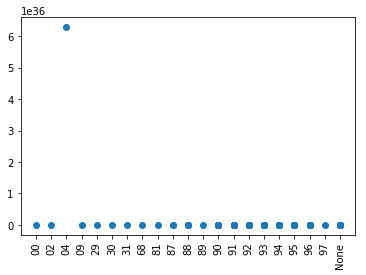

In [10]:
import matplotlib.pyplot as plt

def add_noise(dataset):
    bla = []
    for i,entry in enumerate(dataset):
        if entry:
            noise = 2*np.random.randint(-100,100)/1000
            bla.append(float(entry) + noise)
        else:
            bla.append(0)
    return bla

def make_number(dataset):
    bla = []
    for i,entry in enumerate(dataset):
        print(entry)
        try:
            value = float(entry)
            print(value)
            bla.append(value)
        except ValueError as e:
            print(e)
            bla.append(0)
    return bla

def plot_relation(first, second):
    plt.scatter(first,second, alpha=1)
    plt.xticks(rotation='vertical')
    plt.show()

plot_relation([y for (x,y) in d7],make_number(d9))

In [11]:
[x for (x,y) in d7]

['12',
 '08',
 None,
 '02',
 '01',
 '08',
 '09',
 None,
 '04',
 '08',
 '05',
 '03',
 None,
 None,
 '04',
 '02',
 '01',
 '10',
 '02',
 '03',
 '01',
 '12',
 '11',
 '11',
 None,
 '09',
 '10',
 '04',
 '12',
 '10',
 '11',
 None,
 '10',
 '01',
 '05',
 None,
 None,
 '01',
 '14',
 None,
 None,
 '06',
 '01',
 None,
 '05',
 '12',
 '08',
 '05',
 '01',
 '10',
 None,
 '12',
 '04',
 '07',
 '01',
 '08',
 '10',
 None,
 '03',
 '04',
 '01',
 '01',
 '11',
 '03',
 None,
 '11',
 '01',
 '12',
 '09',
 '12',
 '01',
 '07',
 '12',
 '08',
 '09',
 '08',
 '03',
 '09',
 '11',
 '08',
 '02',
 '04',
 '10',
 '05',
 '07',
 '03',
 '04',
 '05',
 '06',
 '06',
 '09',
 '12',
 None,
 '11',
 '4',
 '08',
 '11',
 '02',
 '09',
 None,
 None,
 None,
 None,
 '12',
 '06',
 '05',
 '10',
 '02',
 '03',
 '10',
 None,
 '09',
 '09',
 None,
 '01',
 '11',
 '09',
 '11',
 '12',
 '02',
 '05',
 '09',
 '03',
 '11',
 '04',
 '04',
 '06',
 '04',
 '09',
 '03',
 '12',
 '02',
 '03',
 '05',
 None,
 '12',
 '10',
 '02',
 None,
 '09',
 '04',
 '03',
 '06',


In [12]:
# Support is the number of occurences out of total
# Confidence is the number of hits out of blanbla


def get_data(first, second, first_val, second_val):
    
    hit_count = 0
    first_count = 0
    assert len(first) == len(second)
    for i in range(len(first)):
        if int(first[i]) == first_val:
            first_count += 1
            if int(second[i]) == second_val:
                hit_count += 1
    total_count = len(first)
    support = hit_count/total_count
    confidence = hit_count / first_count

    return confidence, support
#d1, d2, d3,d4,d8
def bla(first, second):
    print(get_data(first,second,1,1))
    print(get_data(first,second,1,0))
    print(get_data(first,second,0,1))
    print(get_data(first,second,0,0))

bla(d8,d4)  
#11, 10, 01, 00    
    

(0.6363636363636364, 0.03225806451612903)
(0.36363636363636365, 0.018433179723502304)
(0.467005076142132, 0.423963133640553)
(0.5076142131979695, 0.4608294930875576)


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#g = sns.FacetGrid(data, col=d5)
#g.map(plt.hist, 'Time you went to be Yesterday', bins=20)
#Cant do it because of the two's :(

In [43]:
dat2.describe()

,Have you taken a course on machine learning?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.580645,0.917051,0.534562,0.327189,1.516129,0.133641
std,0.521921,0.350310,0.552732,0.508126,1.209900,0.446822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
